<div style="background-color:rgb(151, 156, 151); padding: 20px; text-align: center; border-radius: 8px; color: white; font-size: 36px;width: 60%; margin: 0 auto">
  <strong>Rede Neuronales Recurrentes</strong><br>
  <em>Long-Short Term Memory (LSTM)</em>
</div>


In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

Entrenamiento

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


Prueba

In [3]:
df_test=pd.read_csv('Aportes_2.csv',parse_dates=True,index_col='Date')
df_test.head(3)

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2023-09-01,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,15.6,27.0,96.0,NARE CP,9.801
2023-09-02,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,7.6,22.6,98.0,NARE CP,10.446
2023-09-03,-0.32,-0.87,-0.7,-0.74,-0.55,-0.09,0.55,0.85,0.77,0.42,2023,9,1.6,1,0,15.4,25.2,94.0,NARE CP,10.564


# 2. Preprocesamiento

In [4]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df_test.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [5]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df_test['ValorAnterior']=df_test['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [6]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df_test.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [9]:
rows, col = df.shape
print("El número total de registros es de: ",rows)
print("El número total de columnas es de: ",col)

El número total de registros es de:  8637
El número total de columnas es de:  14


Revisar los datos de prueba

In [10]:
df_test.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      1
dtype: int64

## 1.2 Normalizar los datos

In [11]:
dataset = df.values # Convertir a numpy array
test_data = df_test.values # Convertir a numpy array

In [12]:
training_data_len = len(dataset)  # Total de dato para entrenamiento y validación
test_data_len = len(test_data)  # Total de datos para test
print("Total de datos para entrenamiento y validación: ",training_data_len)
print("Total de datos para test: ",test_data_len)

Total de datos para entrenamiento y validación:  8637
Total de datos para test:  488


In [13]:
dataset[:,12] # Aportes

array([43.51 , 43.67 , 41.21 , ..., 32.565, 28.913, 26.057])

In [14]:
scaler = StandardScaler()
scaler2 = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_test_data = scaler2.fit_transform(test_data)

## 1.3 Separar los datos de entrenamiento y validación

In [15]:
train_val_data = scaled_data

In [16]:
val_data_len = int(np.ceil(len(train_val_data) * 0.05))  # 5% de los datos de para validación
training_data = train_val_data[:-val_data_len]
val_data = train_val_data[-val_data_len:]

In [17]:
print(f"Total de datos de entrenamiento: {len(training_data)}")
print(f"Total de datos de validación: {len(val_data)}")

Total de datos de entrenamiento: 8205
Total de datos de validación: 432


In [18]:
training_data.shape

(8205, 14)

## 1.3 Crear ventana de tiempo

Datos de entrenamiento

In [ ]:
X_train, y_train = [], []

window_slide = 90 # 90 días

for i in range(window_slide, len(training_data)):
    X_train.append(training_data[i-window_slide:i,:]) # Todas las variables
    y_train.append(training_data[i,12]) # Aportes
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [20]:
X_train.shape

(8115, 90, 14)

In [21]:
y_train.shape

(8115,)

Datos de validación

In [22]:
X_val, y_val = [], []
for i in range(len(training_data), len(train_val_data)):
    X_val.append(train_val_data[i-window_slide:i, :])  # Todas la variables
    y_val.append(train_val_data[i, 12])  # Aportes

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 14))

# 3. Construir el modelo

In [23]:
from keras import regularizers

# Definir modelo
model = keras.models.Sequential()

# Añadir capas LSTM
model.add(keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],14), kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

# Añadir capas densas
model.add(keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

In [25]:
model.compile(optimizer=optimizer,
              loss="mae",
              metrics=[keras.metrics.R2Score()])

# 4. Entrenar

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [27]:
training = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=40, 
                    batch_size=64, 
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - loss: 2.5752 - r2_score: 0.4013 - val_loss: 0.6251 - val_r2_score: 0.7066 - learning_rate: 0.0010
Epoch 2/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - loss: 0.6117 - r2_score: 0.5480 - val_loss: 0.4217 - val_r2_score: 0.7488 - learning_rate: 0.0010
Epoch 3/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.4843 - r2_score: 0.6151 - val_loss: 0.3643 - val_r2_score: 0.7999 - learning_rate: 0.0010
Epoch 4/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.4450 - r2_score: 0.6554 - val_loss: 0.3321 - val_r2_score: 0.8235 - learning_rate: 0.0010
Epoch 5/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - loss: 0.4346 - r2_score: 0.6715 - val_loss: 0.2974 - val_r2_score: 0.8363 - learning_rate: 0.0010
Epoch 6/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.4266 - r2_score: 0.6580 - val_loss: 0.3198 - val_r2_score: 0.8381 - learning_rate: 0.0010
Epoch 7/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.4230 

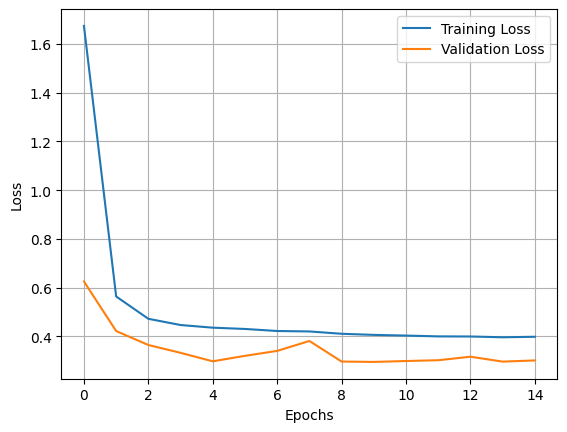

In [28]:
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [46]:
model.save('model.keras')

# 5. Resultados

In [29]:
# Preparar los datos de test
test_data = scaled_test_data[:]
X_test, y_test = [], test_data[:,12]

for i in range(window_slide, len(test_data)):
    X_test.append(test_data[i-window_slide:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [30]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step


In [31]:
predictions_val = model.predict(X_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [32]:
predictions.shape

(398, 1)

In [33]:
predictions = np.repeat(predictions, 14, axis=1)
predictions_final = scaler2.inverse_transform(predictions)

In [34]:
predictions_val = np.repeat(predictions_val, 14, axis=1)
predictions_final_val = scaler.inverse_transform(predictions_val)

In [35]:
train = df[['AporCaudal']]
val = df[['AporCaudal']][-val_data_len:]
test =  df_test[['AporCaudal']][window_slide:]

In [36]:
predictions = predictions_final[:, 12] 

In [37]:
predictions_val = predictions_final_val[:, 12]

In [38]:
predictions = pd.DataFrame(predictions, index=test.index, columns=["Predictions"])

In [39]:
predictions_val = pd.DataFrame(predictions_val, index=val.index, columns=["Predictions"])

In [40]:
predictions.head(1)

,Predictions
Date,
2023-11-30,13.489357


In [41]:
test.head(1)

,AporCaudal
Date,
2023-11-30,10.65


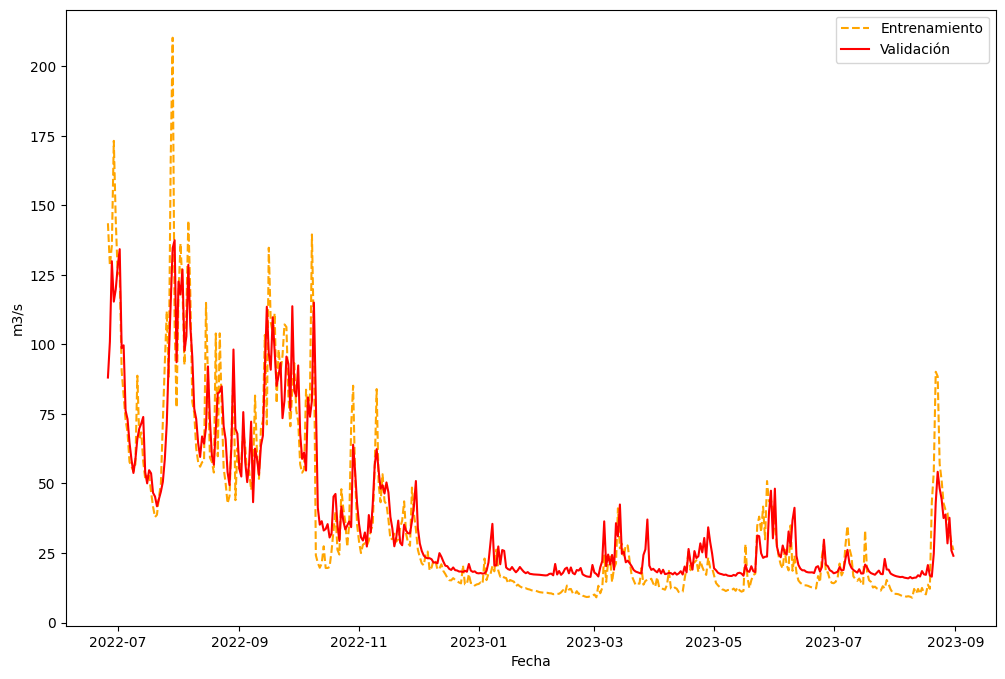

In [42]:
plt.figure(figsize=(12,8))
plt.plot(val, label="Entrenamiento", color='orange', linestyle='dashed')
plt.plot(predictions_val, label="Validación", color='red')
plt.xlabel("Fecha")
plt.ylabel("m3/s")
plt.legend()
plt.show()

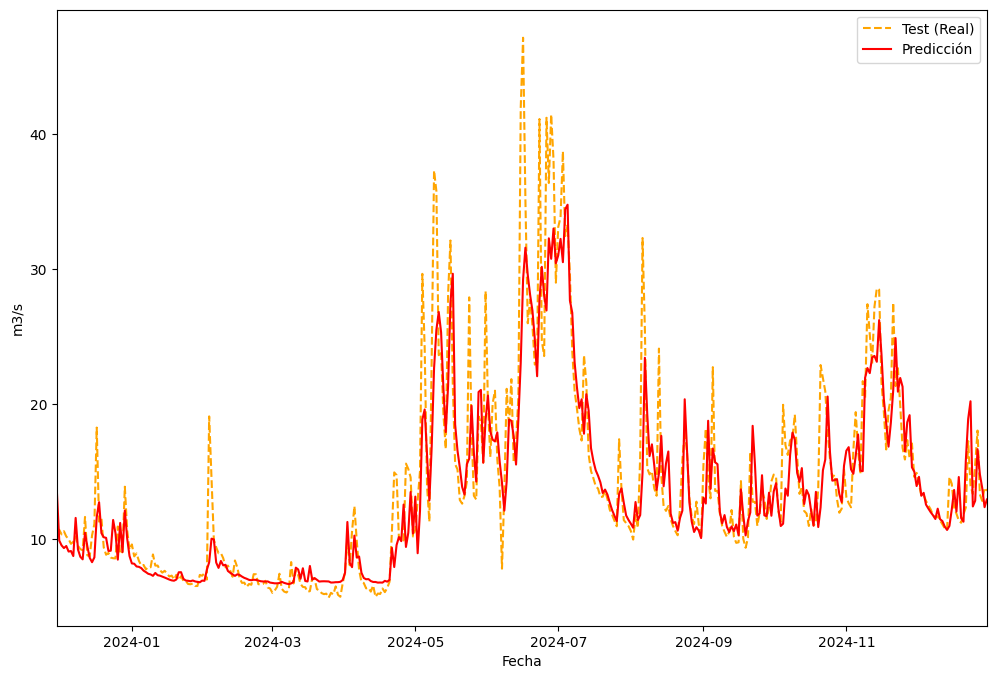

In [43]:
import matplotlib.pyplot as plt

# Definir el periodo de las predicciones
start_date = predictions.index.min()  # Primer día de las predicciones
end_date = predictions.index.max()    # Último día de las predicciones

plt.figure(figsize=(12,8))

# Graficar datos de prueba
plt.plot(test, label="Test (Real)", color='orange',linestyle='dashed')

# Graficar predicciones
plt.plot(predictions.index, predictions, label="Predicción", color='red')

# Ajustar el rango de fechas (zoom en el periodo de las predicciones)
plt.xlim(start_date, end_date)

plt.xlabel("Fecha")
plt.ylabel("m3/s")
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from math import sqrt

# Calcular MSE, MAE, RMSE y R²
mse = mean_squared_error(test['AporCaudal'], predictions['Predictions'])
mae = mean_absolute_error(test['AporCaudal'], predictions['Predictions'])
rmse = sqrt(mse)
r2 = r2_score(test['AporCaudal'], predictions['Predictions'])

# Crear un DataFrame para mostrar las métricas
metrics = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R²'],
    'Value': [mse, mae, rmse, r2]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla con las métricas
metrics_df

,Metric,Value
0,MSE,11.172882
1,MAE,1.953541
2,RMSE,3.342586
3,R²,0.794115


## 5.1. Análisis de resultados

El modelo muestra un rendimiento sólido como base para la predicción de series temporales aplicadas al caso de aportes de caudales, obteniendo un puntaje de R² de validación de aproximadamente 0.84 y un R² de prueba de 0.79, lo que indica que captura una porción significativa de la tendencia subyacente en los datos. El proceso de entrenamiento evidenció una mejora consistente en las pérdidas tanto de entrenamiento como de validación, lo que sugiere que el modelo está aprendiendo de manera efectiva, aunque las fluctuaciones ocasionales en el rendimiento de validación destacan cierta inestabilidad. El uso de regularización L2 y capas de dropout contribuye a mitigar el sobreajuste, como lo demuestra la relativa estabilidad de las métricas de validación a pesar de la complejidad del modelo.

Sin embargo, los intentos de mejorar el rendimiento aumentando la complejidad del modelo—como añadir más capas LSTM, capas densas o neuronas—no resultaron en mejores resultados y, en algunos casos, llevaron a una disminución en el puntaje R² de prueba. Esto sugiere que el modelo ya está capturando la mayoría de los patrones aprendibles en los datos y que, por sí solas, mejoras en la arquitectura no son suficientes para optimizar el rendimiento. En cambio, la falta de mejoras indica limitaciones potenciales en el propio conjunto de datos, como un volumen insuficiente de datos, características ruidosas o redundantes, o dificultades inherentes en los patrones temporales que se están modelando.

Aunque el modelo actual proporciona una base funcional para la predicción, lograr una mayor precisión probablemente requerirá un enfoque más holístico que combine mejoras en la calidad de los datos, ingeniería de características y una optimización detallada de hiperparámetros.